In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For pretty plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv("owid-energy-data.csv")
print(df.shape)
print(df.columns.tolist())


(21975, 130)
['country', 'year', 'iso_code', 'population', 'gdp', 'biofuel_cons_change_pct', 'biofuel_cons_change_twh', 'biofuel_cons_per_capita', 'biofuel_consumption', 'biofuel_elec_per_capita', 'biofuel_electricity', 'biofuel_share_elec', 'biofuel_share_energy', 'carbon_intensity_elec', 'coal_cons_change_pct', 'coal_cons_change_twh', 'coal_cons_per_capita', 'coal_consumption', 'coal_elec_per_capita', 'coal_electricity', 'coal_prod_change_pct', 'coal_prod_change_twh', 'coal_prod_per_capita', 'coal_production', 'coal_share_elec', 'coal_share_energy', 'electricity_demand', 'electricity_demand_per_capita', 'electricity_generation', 'electricity_share_energy', 'energy_cons_change_pct', 'energy_cons_change_twh', 'energy_per_capita', 'energy_per_gdp', 'fossil_cons_change_pct', 'fossil_cons_change_twh', 'fossil_elec_per_capita', 'fossil_electricity', 'fossil_energy_per_capita', 'fossil_fuel_consumption', 'fossil_share_elec', 'fossil_share_energy', 'gas_cons_change_pct', 'gas_cons_change_twh

In [3]:
# Remove rows that represent regions, continents, or global aggregates
df = df[~df['iso_code'].isin(['OWID_WRL', 'OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_NAM', 'OWID_OCE', 'OWID_SAM'])]

# Keep only data from 1990 onwards for relevance
df = df[df['year'] >= 1990]

# Check for nulls in important columns
important_columns = ['country', 'year', 'coal_consumption', 'oil_consumption',
                     'gas_consumption', 'renewables_consumption', 'primary_energy_consumption']
df_clean = df[important_columns].dropna()


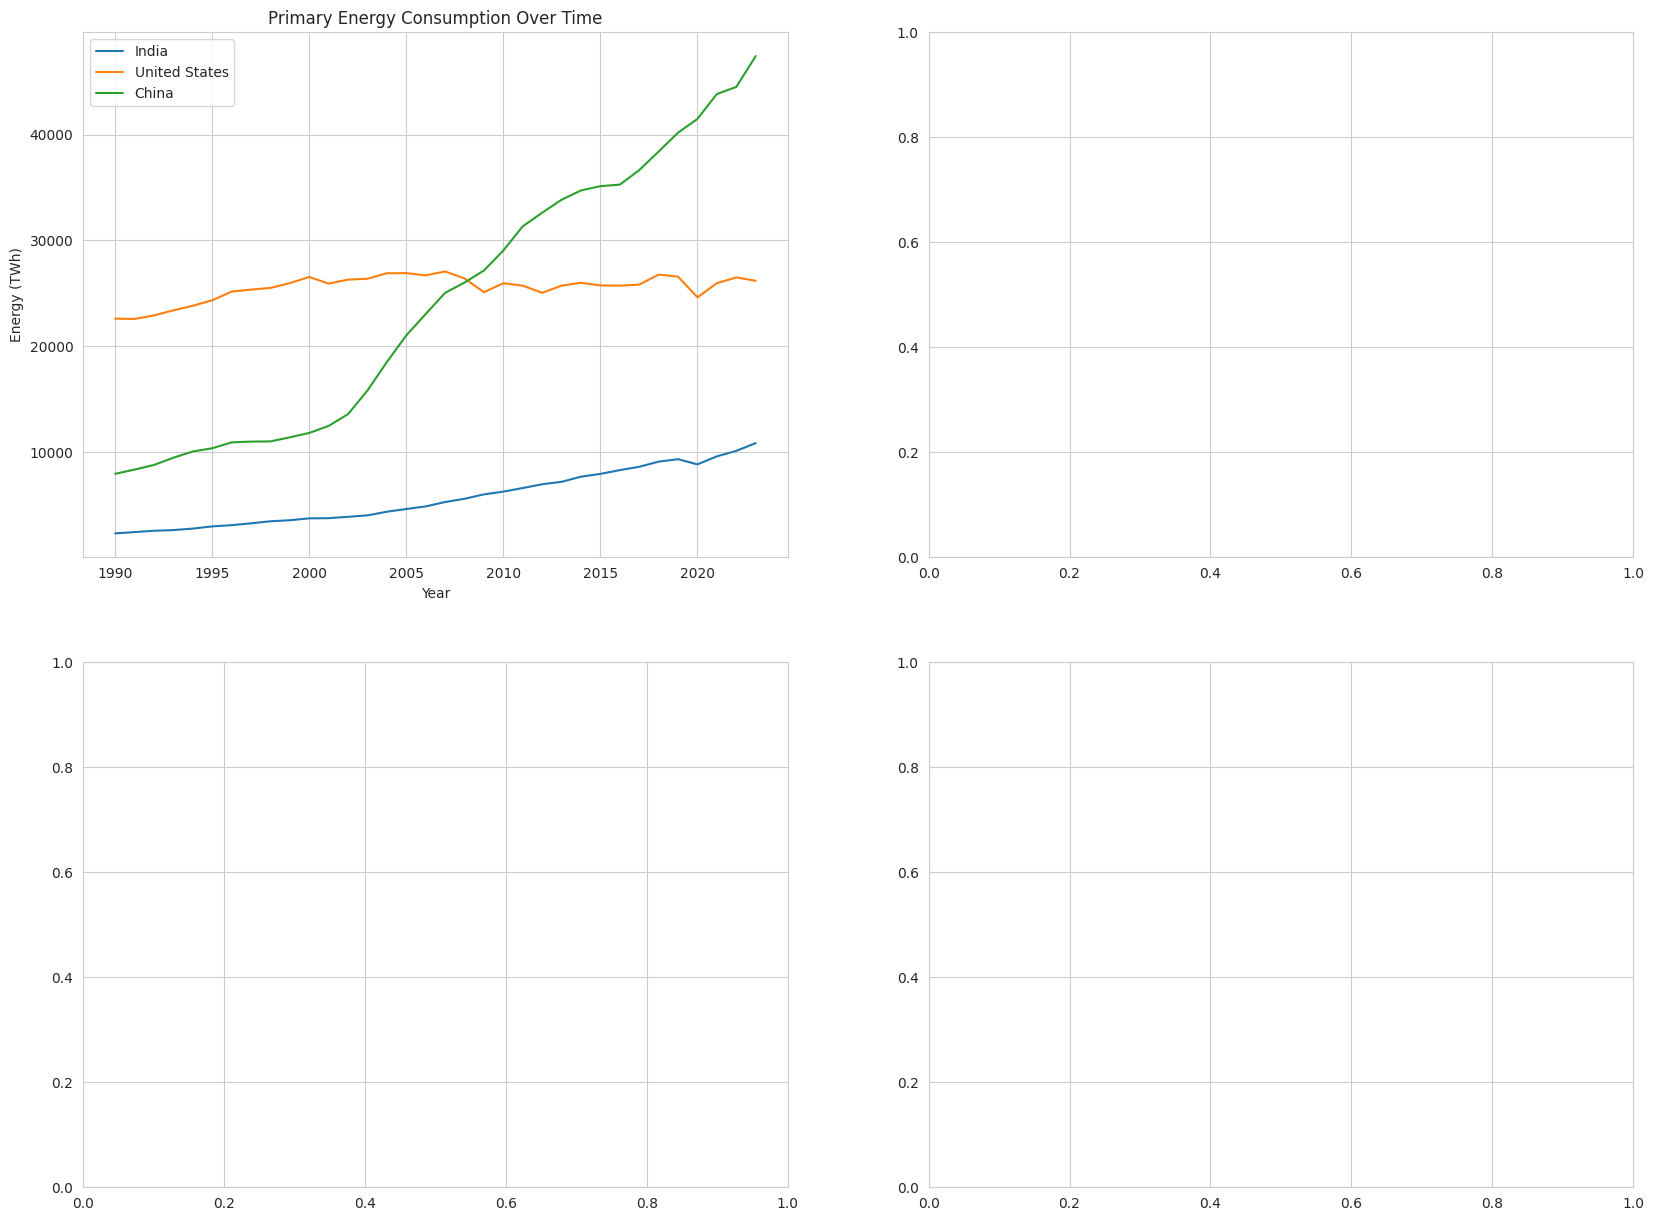

In [10]:
# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# Plot 1: Primary Energy Consumption Over Time
countries = ['India', 'United States', 'China']
for country in countries:
    subset = df_clean[df_clean['country'] == country]
    axes[0, 0].plot(subset['year'], subset['primary_energy_consumption'], label=country)

axes[0, 0].set_title('Primary Energy Consumption Over Time')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Energy (TWh)')
axes[0, 0].legend()

In [11]:
# Plot 2: India Energy Mix (1990–2023)
country = 'India'
df_india = df[df['country'] == country][['year', 'coal_consumption', 'oil_consumption', 'gas_consumption', 'renewables_consumption']].fillna(0)
df_india.set_index('year', inplace=True)
df_india.plot.area(stacked=True, cmap='tab20', ax=axes[0, 1])
axes[0, 1].set_title(f'{country} Energy Mix (1990–2023)')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Energy Consumption (TWh)')

Text(891.3295454545454, 0.5, 'Energy Consumption (TWh)')

In [12]:
# Plot 3: Correlation Between Energy Sources
subset = df_clean[['coal_consumption', 'oil_consumption', 'gas_consumption', 'renewables_consumption']]
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 0])
axes[1, 0].set_title('Correlation Between Energy Sources')

Text(0.5, 1.0, 'Correlation Between Energy Sources')

In [13]:
# Plot 4: Top 10 Countries by Renewable Energy (2021)
top_renewables = df[df['year'] == 2021].sort_values(by='renewables_consumption', ascending=False).head(10)
sns.barplot(data=top_renewables, y='country', x='renewables_consumption', palette='crest', ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Countries by Renewable Energy (2021)')
axes[1, 1].set_xlabel('Renewables (TWh)')
axes[1, 1].set_ylabel('Country')

plt.tight_layout()
plt.show()

/tmp/ipython-input-13-3130320318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_renewables, y='country', x='renewables_consumption', palette='crest', ax=axes[1, 1])


<Figure size 1200x600 with 0 Axes>

In [14]:
# This plot is not included in the combined figure as it is a pie chart and not easily combined with the other plot types.
# year = 2021
# row = df[(df['country'] == 'India') & (df['year'] == year)].iloc[0]
# energy_mix = {
#     'Fossil Fuels': row['fossil_fuel_consumption'],
#     'Renewables': row['renewables_consumption'],
#     'Nuclear': row.get('nuclear_consumption', 0)
# }

# plt.pie(energy_mix.values(), labels=energy_mix.keys(), autopct='%1.1f%%', startangle=140)
# plt.title(f'India Energy Mix in {year}')
# plt.tight_layout()
# plt.show()

In [15]:
# Save the entire figure with all subplots
fig.savefig("all_energy_plots.png", dpi=300)